In [1]:
%autosave 10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
df=pd.read_csv("cleaned_data.csv")
df['default payment next month'].mean()

0.2217971797179718

In [3]:
df.groupby("default payment next month")['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [4]:
X= df['LIMIT_BAL'].values.reshape(-1,1)
y= df['default payment next month'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.2, random_state=24)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [6]:
from sklearn.linear_model import LogisticRegression
lr1= LogisticRegression()
lr1.solver='lbfgs'
lr1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [7]:
y_pred = lr1.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [8]:
from sklearn import metrics
y_pred_proba = lr1.predict_proba(X_test)
ROC_AREA_BY_LIMIT_BAL = metrics.roc_auc_score(y_test,y_pred_proba[:,1])
ROC_AREA_BY_LIMIT_BAL

0.6201990844642832

In [9]:
X = df['EDUCATION'].values.reshape(-1,1)
y= df['default payment next month'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.2, random_state=24)
lr2 = LogisticRegression()
lr2.solver='lbfgs'
lr2.fit(X_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred2 = lr2.predict(X_test2)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
from sklearn import metrics
y_pred_proba2 = lr2.predict_proba(X_test2)
ROC_AREA_BY_EDUCATION = metrics.roc_auc_score(y_test2,y_pred_proba2[:,1])
ROC_AREA_BY_EDUCATION

0.5434650477972642

In [12]:
print("ROC_AREA OF LIMIT BALANCE IS GREATER THAN EDUCATION")

ROC_AREA OF LIMIT BALANCE IS GREATER THAN EDUCATION


_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

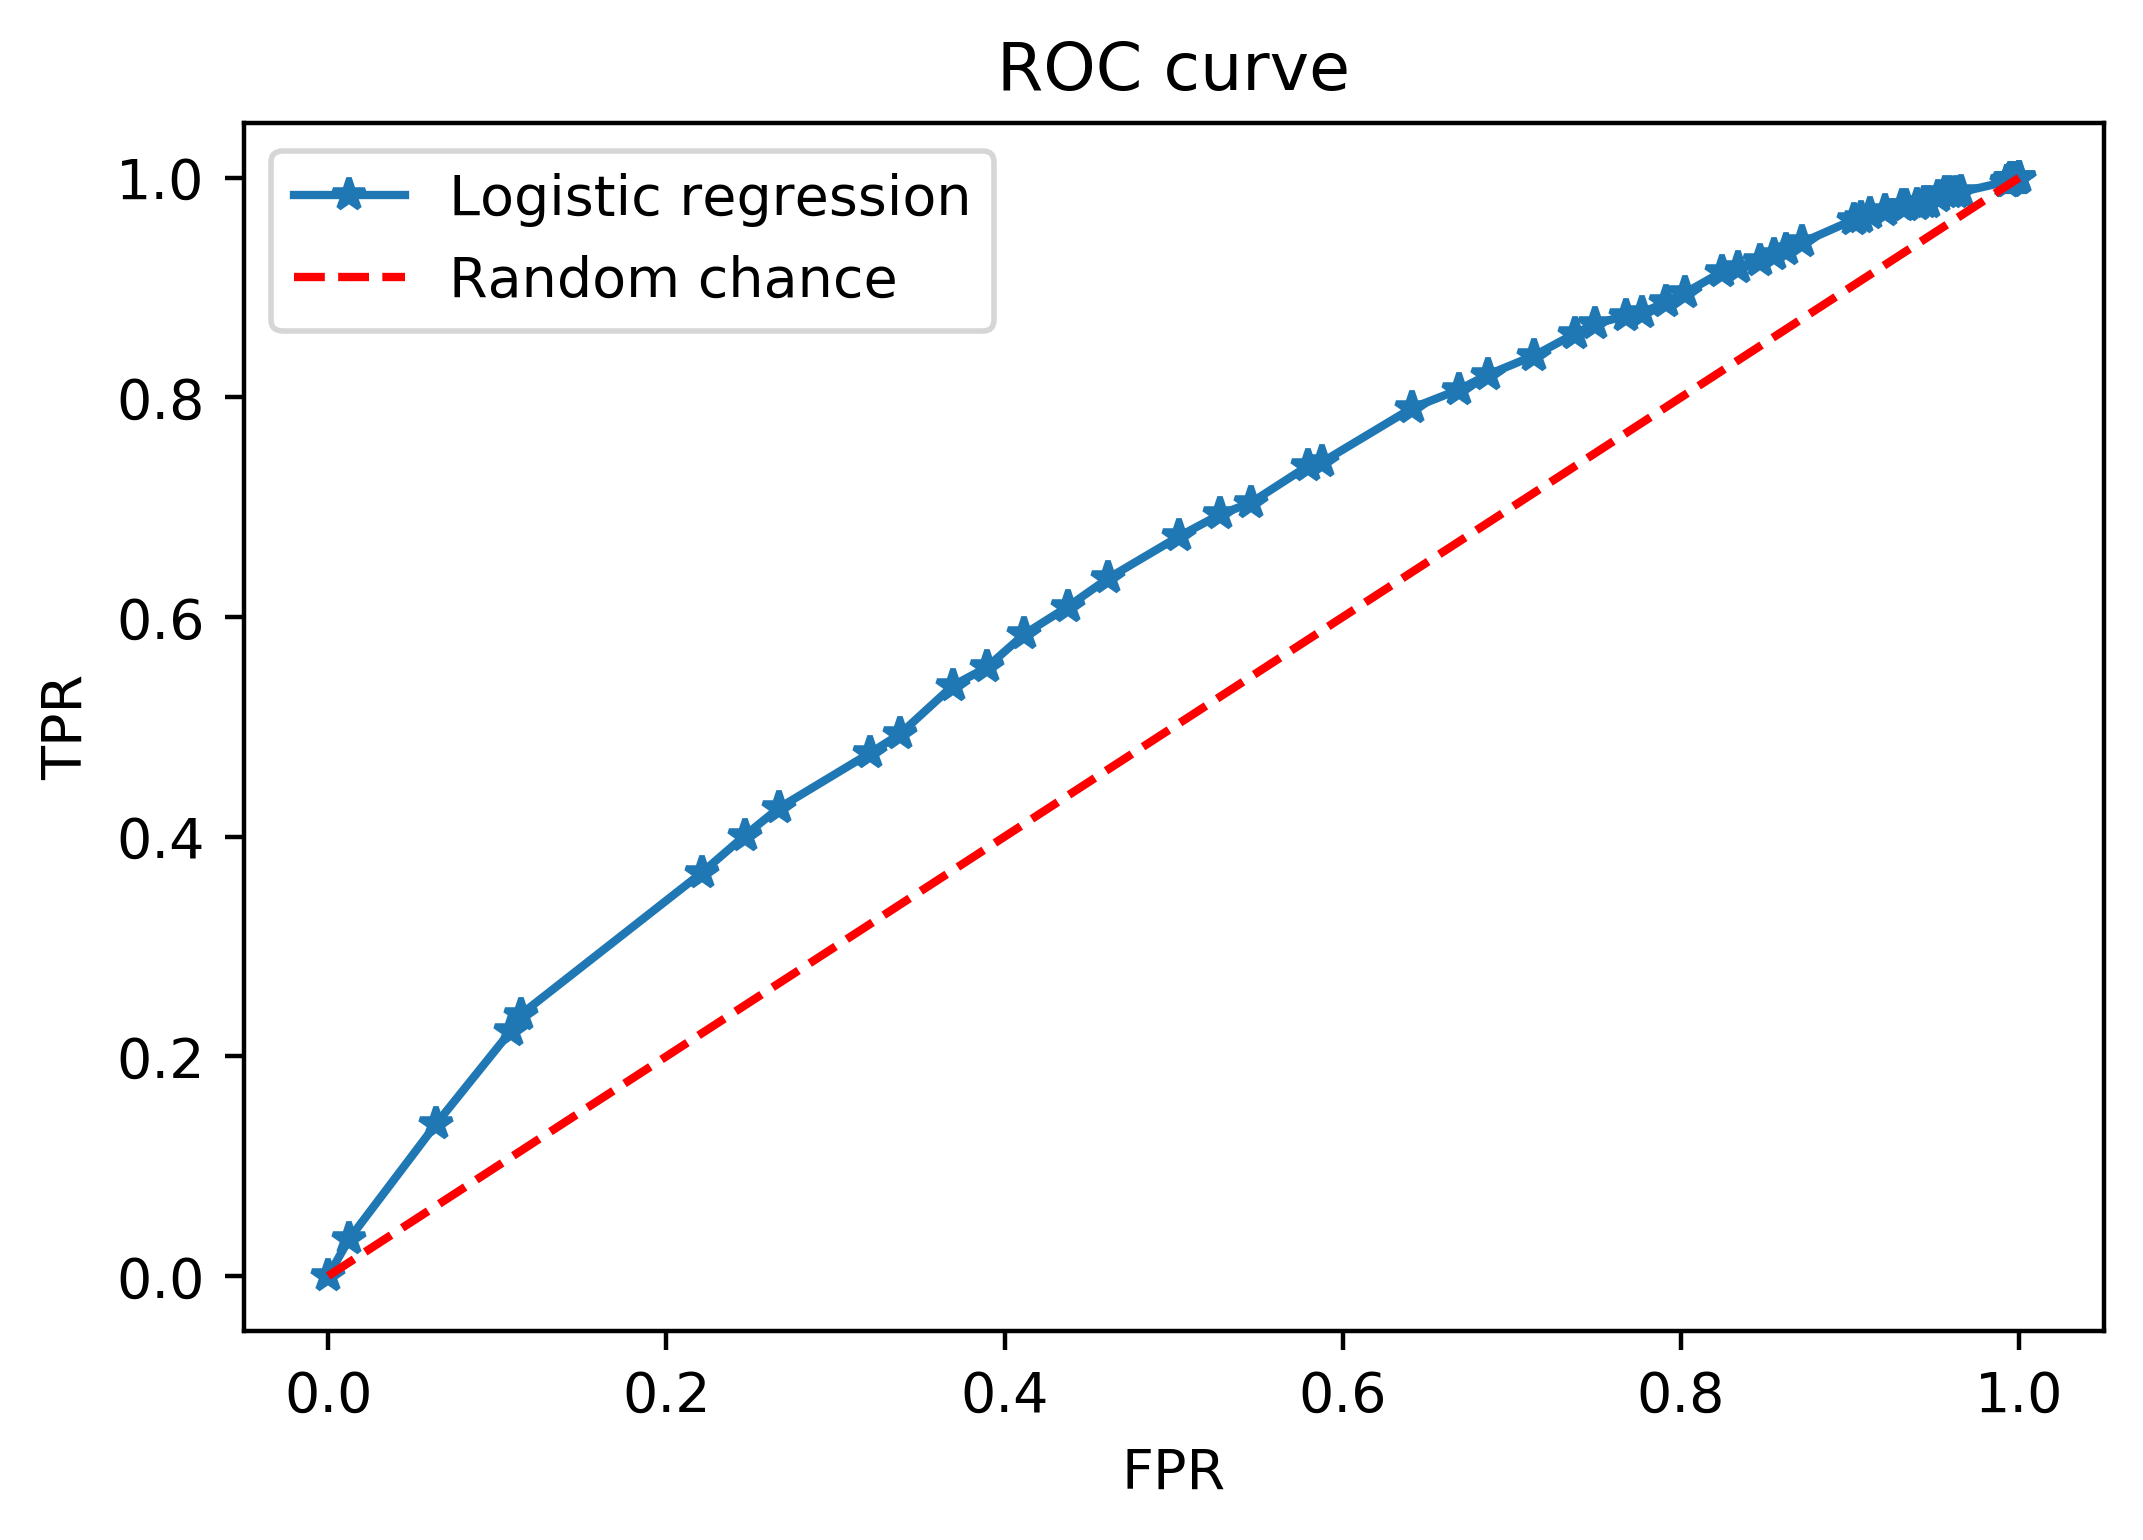

In [13]:
fpr , tpr , threshold = metrics.roc_curve(y_test,y_pred_proba[:,1])
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')


_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [14]:
import sys
p = sum(y_test)
TP = sum((y_test==1)&(y_pred==1))
FN = sum((y_test==1)&(y_pred==0))
N = sum(y_test==0)
TN = sum((y_test==0)&(y_pred==0))
FP = sum((y_test==0)&(y_pred==1))
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision is {} and recall is {}".format(precision,recall))

Precision is nan and recall is 0.0


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


In [15]:
import sklearn.metrics
metrics.average_precision_score(y_test2, lr2.predict_proba(X_test2)[:,1])

0.23480414538268662

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [16]:
train_prob = lr1.predict_proba(X_train)
metrics.roc_auc_score(y_train, train_prob[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
